<a href="https://colab.research.google.com/github/AbelRapha/DataProjects/blob/main/Mini_Projeto_de_An%C3%A1lise_de_Dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício - Mini Projeto de Análise de Dados


### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    
    
    
2. Qual foi o faturamento da empresa?<br>
   
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
   
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
  

In [2]:
import pandas as pd

In [4]:
TabelaFuncionarios = pd.read_csv(r"/content/CadastroFuncionarios.csv", sep = ";", decimal = ',')

In [7]:
TabelaClientes = pd.read_csv(r"/content/CadastroClientes.csv", sep = ";", decimal = ',')

In [9]:
TabelaServicos = pd.read_excel(r"/content/BaseServiçosPrestados.xlsx")

Limpeza dos dados

In [21]:
TabelaFuncionarios.head()
#retirar colunas estado civil e cargo
funcionarios_df = TabelaFuncionarios.drop(["Estado Civil", 'Cargo'], axis = 1)
funcionarios_df.head()

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955,4382,242,"719,04",Operações
1,2,João Haddad,5404,2702,"1080,8",154,"574,56",Logística
2,3,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Administrativo
3,4,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Administrativo
4,5,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Administrativo


In [22]:
TabelaClientes.head()

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


In [31]:
TabelaServicos.head()
servicos_df = TabelaServicos.drop(["Codigo do Servico"], axis = 1)
servicos_df.head()

,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,67,1,14
1,17,2,12
2,116,4,14
3,37,5,8
4,130,6,8


Custo total com a Folha Salarial

In [82]:
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID Funcionário        114 non-null    int64  
 1   Nome Completo         114 non-null    object 
 2   Salario Base          114 non-null    float64
 3   Impostos              114 non-null    float64
 4   Beneficios            114 non-null    float64
 5   VT                    114 non-null    float64
 6   VR                    114 non-null    float64
 7   Area                  114 non-null    object 
 8   Custo Total da Folha  114 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.1+ KB


In [55]:
funcionarios_df
#Converter para float: Impostos, Beneficios, VT e VR
funcionarios_df['Impostos'] = funcionarios_df['Impostos'].apply(lambda x : str(x).replace(",","."))
funcionarios_df['Impostos'] = funcionarios_df["Impostos"].astype("float64")

funcionarios_df['Beneficios'] = funcionarios_df['Beneficios'].apply(lambda x : str(x).replace(",","."))
funcionarios_df['Beneficios'] = funcionarios_df["Beneficios"].astype("float64")

funcionarios_df['VR'] = funcionarios_df['VR'].apply(lambda x : str(x).replace(",","."))
funcionarios_df["VR"] = funcionarios_df["VR"].astype("float64")

funcionarios_df['Salario Base'] = funcionarios_df['Salario Base'].astype("float64")
funcionarios_df['VT'] = funcionarios_df['VT'].astype("float64")

In [57]:
funcionarios_df["Custo Total da Folha"] = funcionarios_df['Salario Base']+funcionarios_df['VR']+funcionarios_df['VT']+funcionarios_df['Beneficios']+funcionarios_df['Impostos']
print("Total da Folha Salarial mensal {:,}".format(funcionarios_df['Custo Total da Folha'].sum()))

Total da Folha Salarial mensal 2,717,493.22


Calculando o Faturamento da Empresa

In [61]:
TabelaClientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


In [62]:
TabelaServicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


Como O tempo total de contrato e o valor de contrato estão no mesmo tipo é possível relacionar eles

In [63]:
servicos_df = TabelaServicos.copy()
clientes_df = TabelaClientes.copy()

In [64]:
servicos_df['ID Cliente'].value_counts()

311    2
320    1
101    1
115    1
113    1
      ..
208    1
206    1
205    1
204    1
1      1
Name: ID Cliente, Length: 236, dtype: int64

In [71]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on = "ID Cliente")


In [72]:
display(faturamentos_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


In [77]:
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)']*faturamentos_df['Valor Contrato Mensal']
print("O faturamento total e R$ {:,} ". format(faturamentos_df['Faturamento Total'].sum()))

O faturamento total e R$ 5,519,160 


In [78]:
display(faturamentos_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


Qual o % de funcionários que já fechou algum contrato?

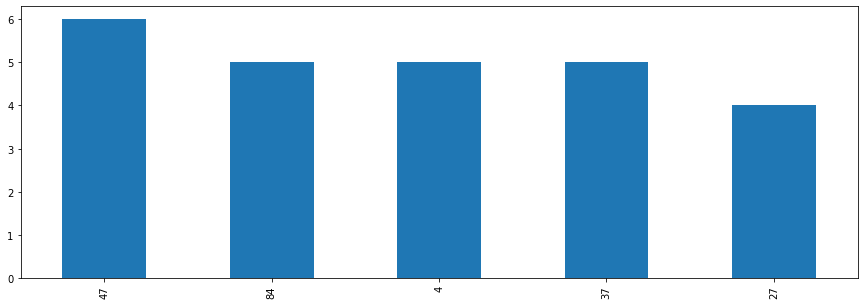

In [110]:
funcionariosQueFecharamContratos = servicos_df['ID Funcionário'].value_counts()
funcionariosQueFecharamContratos[:5].plot(kind = 'bar', figsize = (15,5))

In [109]:
totalFechado = len(funcionariosQueFecharamContratos)
totalDeFuncionarios = len(funcionarios_df['ID Funcionário'])
print("O percentual de funcionarios que ja fechou algum contrato foi de {:.1%}".format(totalFechado/totalDeFuncionarios))

O percentual de funcionarios que ja fechou algum contrato foi de 86.8%


Calcule o total de contratos que cada área da empresa já fechou

Unindo a Tabela de servicos com a tabela de Funcionarios

In [119]:
contratoAreadf = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
contratoAreadf

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

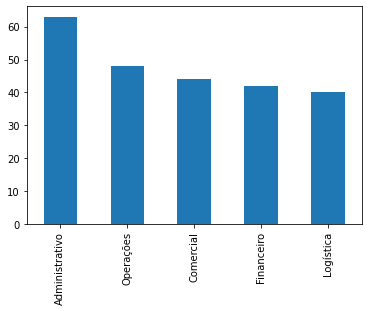

In [125]:
contratosAreaQuantidade = contratoAreadf['Area'].value_counts()
display(contratosAreaQuantidade)
contratosAreaQuantidade.plot(kind = "bar")

Quantos Funcionarios eu possuo em cada Area

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

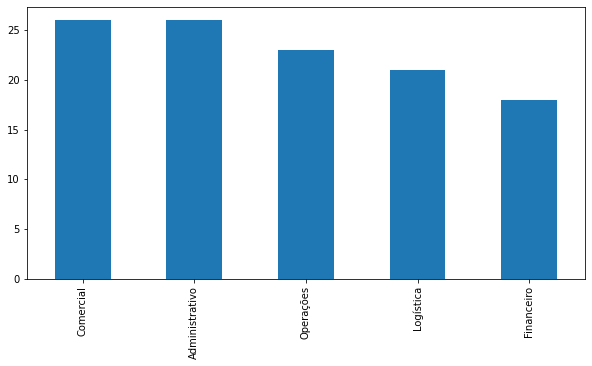

In [124]:
contratoPorArea = funcionarios_df['Area'].value_counts()
display(contratoPorArea)
contratoPorArea.plot(kind = "bar", figsize = (10,5))

Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [140]:
ticketMedio = faturamentos_df['Valor Contrato Mensal'].mean()
print("O ticket medio mensal dos contratos e de R$ {:,.2f}".format(ticketMedio))

O ticket medio mensal dos contratos e de R$ 2,438.35
